In [108]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pitcher_file_path = '../data/picher_stats_2017.csv'
batter_file_path = "../data/batter_stats_2017.csv"
pitcher = pd.read_csv(pitcher_file_path)
batter = pd.read_csv(batter_file_path)

pitcher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [109]:
pitcher.head()
print(pitcher.shape)

(152, 22)


In [110]:
pitcher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

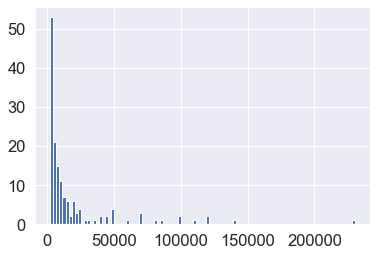

In [111]:
pitcher['연봉(2018)'].hist(bins=100)

C:\Users\qkffp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\qkffp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48393 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\qkffp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\qkffp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48393 missing from current font.
  font.set_text(s, 0, flags=flags)


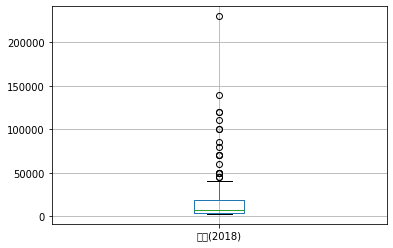

In [10]:
pitcher.boxplot(column=['연봉(2018)'])

In [112]:
pitcher_features_df = pitcher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)']]

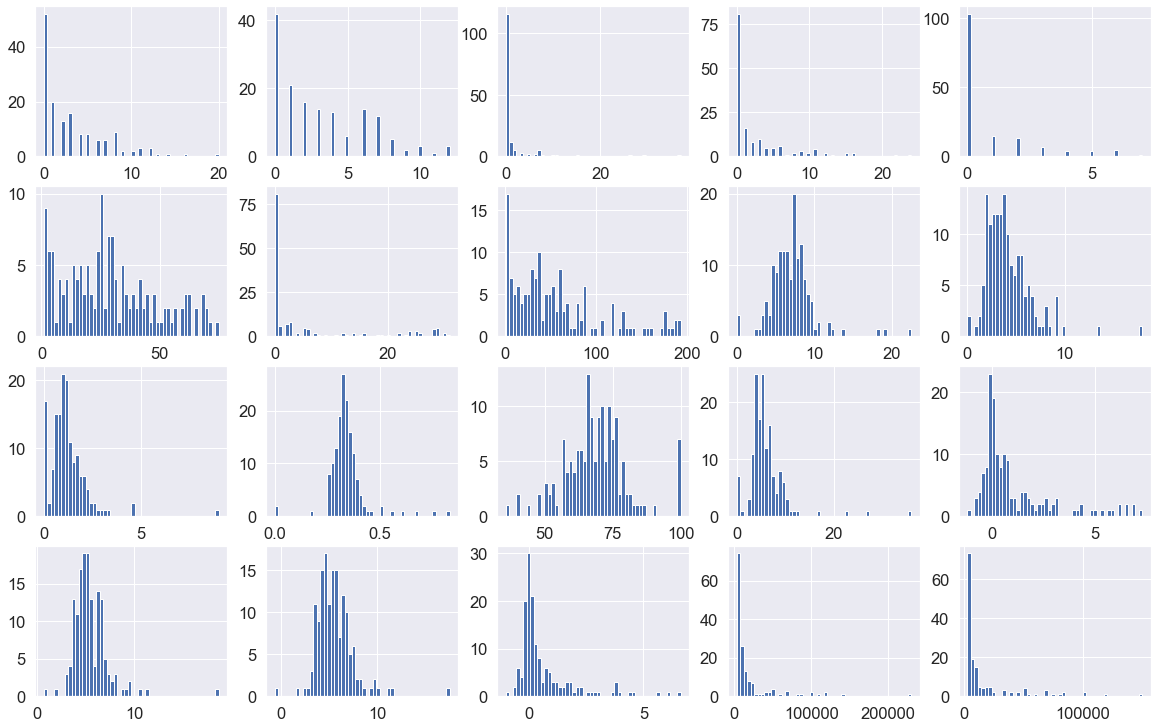

In [113]:
def plot_hist_each_columns(df):
    plt.rcParams['figure.figsize'] = [20,16]
    fig = plt.figure()
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5,5,i+1)
        plt.hist(df[df.columns[i]],bins=50)
        plt.show

plot_hist_each_columns(pitcher_features_df)

In [115]:
pd.options.mode.chained_assignment = None

In [116]:
def standard_scaling(df,scale_columns) :
    for col in scale_columns :
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

In [117]:
import matplotlib as mpl
mpl.rc('font', family='NanumGothicOTF')

In [118]:
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)']
pitcher_df = standard_scaling(pitcher, scale_columns)

In [119]:
pitcher_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


In [123]:
pitcher_df = pitcher_df.rename(columns = {'연봉(2018)' : 'y'}) #연봉 2018을 y로 바꾸기
pitcher_df['y']

0      140000
1      120000
2      230000
3      100000
4      111000
        ...  
147      7100
148      7500
149     10000
150      4000
151      4000
Name: y, Length: 152, dtype: int64

In [121]:
#범주형 변수들 처리해주기
team_encoding = pd.get_dummies(pitcher_df['팀명'])
pitcher_df = pitcher.drop('팀명',axis=1)
pitcher_df = pitcher_df.join(team_encoding)
team_encoding.head(5)
pitcher_df.head()

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,...,2.734705,0,0,0,0,1,0,0,0,0
1,소사,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,...,1.337303,0,0,1,0,0,0,0,0,0
2,양현종,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,...,5.329881,1,0,0,0,0,0,0,0,0
3,차우찬,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,...,3.333592,0,0,1,0,0,0,0,0,0
4,레일리,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,...,2.734705,0,0,0,0,0,0,1,0,0


In [124]:
#이제 직접 테스트 해보기
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

X = pitcher_df[pitcher_df.columns.difference(['선수명','y'])]
y = pitcher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=19)

In [125]:
#회귀계수 모델 학습
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train) #X의 데이터셋을 다 주면 알아서 LSE방식으로 선형회귀를 짜줌
print(lr.coef_) #_의 의미는 무엇?

[ -1481.01733901   -416.68736601 -94136.23649209  -1560.86205158
   1572.00472193   -747.04952389  -1375.53830289   -523.54687556
   3959.10653661    898.37638984  10272.48746451  77672.53804469
  -2434.38947427   -892.11801281    449.91117164   7612.15661812
   1271.04500059  -2810.5564514    5396.97279896  -4797.30275904
   -250.69773139    236.02530053  19130.59021357    854.02604585
   1301.61974637   3613.84063182   -935.07281796  18144.60099745]


In [126]:
#sm가지고 회귀분석하는 방식
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     44.19
Date:                Tue, 09 Jun 2020   Prob (F-statistic):           7.70e-42
Time:                        20:54:40   Log-Likelihood:                -1247.8
No. Observations:                 121   AIC:                             2552.
Df Residuals:                      93   BIC:                             2630.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.678e+04    697.967     24.036      0.000    1.54e+04    1.82e+04
BABIP      -1481.0173   1293.397     -1.145      0.255   -4049.448    1087.414
ERA         -416.6874   2322.402     -0.179      0.858   -5028.517    4195.143
FIP        -9.414e+04   9.43e+04     -0.998      0.321   -2.81e+05    9.31e+04
KIA          303.1852   2222.099      0.136      0.892   -4109.462    4715.833
KT          3436.0520   2133.084      1.611      0.111    -799.831    7671.935
LG          1116.9978   2403.317      0.465      0.643   -3655.513    5889.509
LOB%       -1375.5383   1564.806     -0.879      0.382   -4482.933    1731.857
NC          1340.5004   2660.966      0.504      0.616   -3943.651    6624.652
RA9-WAR     3959.1065   2931.488      1.351      0.180   -1862.247    9780.460
SK          2762.4237   2243.540      1.231      0.221   -1692.803    7217.650
WAR         1.027e+04   2532.309      4.057      0.000    5243.823    1.53e+04
kFIP        7.767e+04   7.95e+04      0.977      0.331   -8.03e+04    2.36e+05
경기         -2434.3895   2953.530     -0.824      0.412   -8299.515    3430.736
두산           971.9293   2589.849      0.375      0.708   -4170.998    6114.857
롯데          2313.9585   2566.009      0.902      0.370   -2781.627    7409.544
볼넷/9        7612.1566   6275.338      1.213      0.228   -4849.421    2.01e+04
블론          1271.0450   1242.128      1.023      0.309   -1195.576    3737.666
삼성          -946.5092   2482.257     -0.381      0.704   -5875.780    3982.762
삼진/9        5396.9728   7286.221      0.741      0.461   -9072.019    1.99e+04
선발         -4797.3028   5489.352     -0.874      0.384   -1.57e+04    6103.463
세           -250.6977   1295.377     -0.194      0.847   -2823.059    2321.663
승            236.0253   2215.264      0.107      0.915   -4163.049    4635.100
연봉(2017)    1.913e+04   1270.754     15.055      0.000    1.66e+04    2.17e+04
이닝           854.0260   6623.940      0.129      0.898   -1.23e+04     1.4e+04
패           1301.6197   1935.935      0.672      0.503   -2542.763    5146.003
한화          5477.8879   2184.273      2.508      0.014    1140.355    9815.421
홀드          -935.0728   1637.923     -0.571      0.569   -4187.663    2317.518
홈런/9        1.814e+04   1.68e+04      1.082      0.282   -1.52e+04    5.14e+04
==============================================================================
Omnibus:                       28.069   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.274
Skew:                          -0.405   Prob(JB):                     6.52e-43
Kurtosis:                       9.155   Cond. No.                     3.37e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

[Text(0, 0, 'const'),
 Text(0, 0, 'BABIP'),
 Text(0, 0, 'ERA'),
 Text(0, 0, 'FIP'),
 Text(0, 0, 'KIA'),
 Text(0, 0, 'KT'),
 Text(0, 0, 'LG'),
 Text(0, 0, 'LOB%'),
 Text(0, 0, 'NC'),
 Text(0, 0, 'RA9-WAR'),
 Text(0, 0, 'SK'),
 Text(0, 0, 'WAR'),
 Text(0, 0, 'kFIP'),
 Text(0, 0, '경기'),
 Text(0, 0, '두산'),
 Text(0, 0, '롯데'),
 Text(0, 0, '볼넷/9'),
 Text(0, 0, '블론'),
 Text(0, 0, '삼성'),
 Text(0, 0, '삼진/9'),
 Text(0, 0, '선발'),
 Text(0, 0, '세'),
 Text(0, 0, '승'),
 Text(0, 0, '연봉(2017)'),
 Text(0, 0, '이닝'),
 Text(0, 0, '패'),
 Text(0, 0, '한화'),
 Text(0, 0, '홀드'),
 Text(0, 0, '홈런/9')]

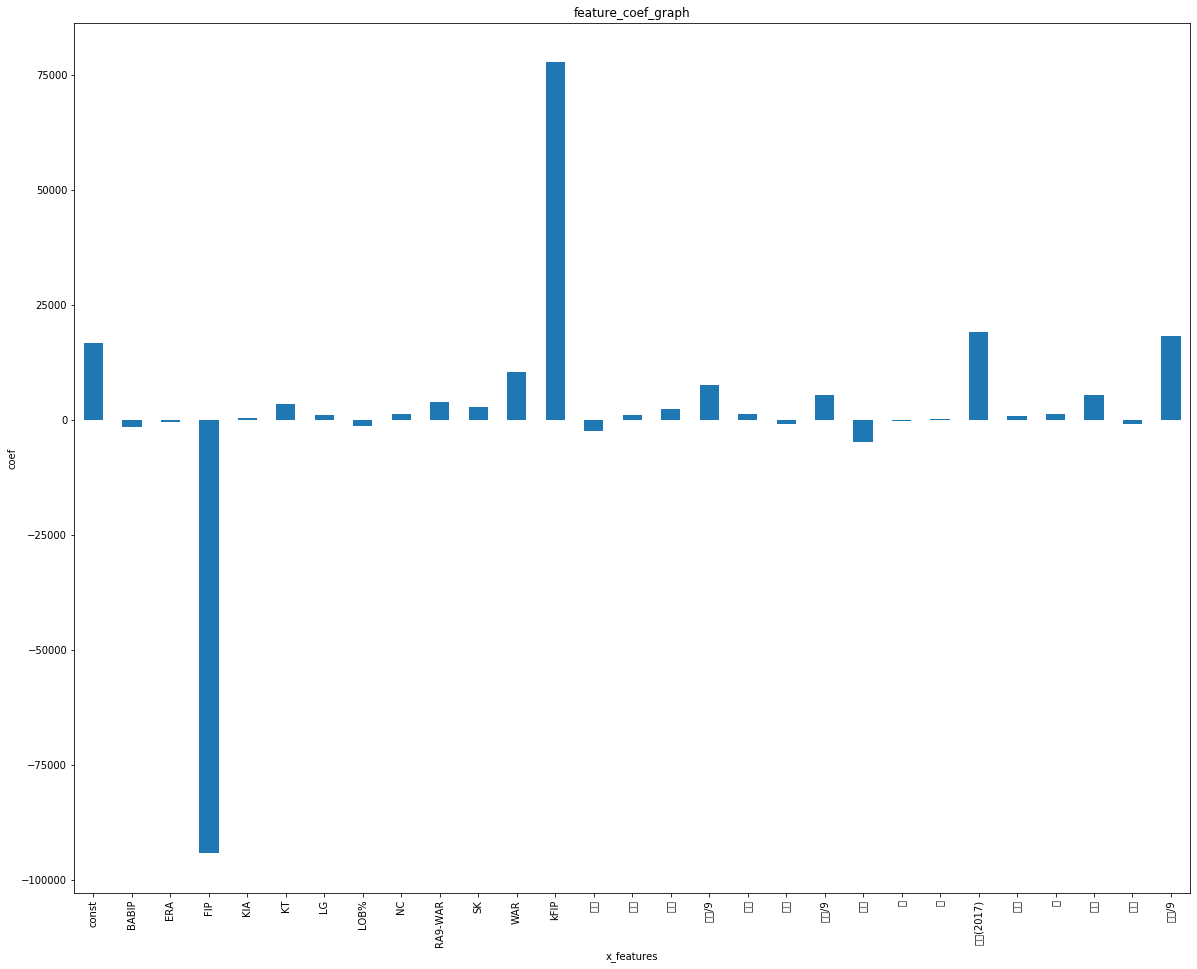

In [82]:
mpl.rc('font',family = "NanumGothicOTF")
plt.rcParams['figure.figsize'] = [20,16]

coef = model.params.tolist() #model의 parameter가 회귀계수를 의미
coef_series = pd.Series(coef)

x_labels = model.params.index.tolist() #변수명을 리스트로 반환하기 #회귀결과값에서는 변수명이 index

ax = coef_series.plot(kind="bar")
ax.set_title('feature_coef_graph')
ax.set_xlabel("x_features")
ax.set_ylabel("coef")
ax.set_xticklabels(x_labels)

In [127]:
X = pitcher_df[pitcher_df.columns.difference(['선수명','y'])]
y = pitcher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=19)

lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9276949405576705
0.8860171644977815


In [128]:
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train,y_predictions)))
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test,y_predictions)))

7282.718684746374
14310.696436889146


In [87]:
#피쳐들의 상관관계를 파악하기 위해 heatmap 그려보기 #heatmap은 seaborn 패키지
import seaborn as sns
corr = pitcher_df[scale_columns].corr(method="pearson")
show_cols = ['win', 'lose', 'save', 'hold', 'blon', 'match', 'start', 
             'inning', 'strike3', 'ball4', 'homerun', 'BABIP', 'LOB', 
             'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '2017']
plt.rc('font',family = "NanumGothicOTF")
sns.set(font_scale=1.5)

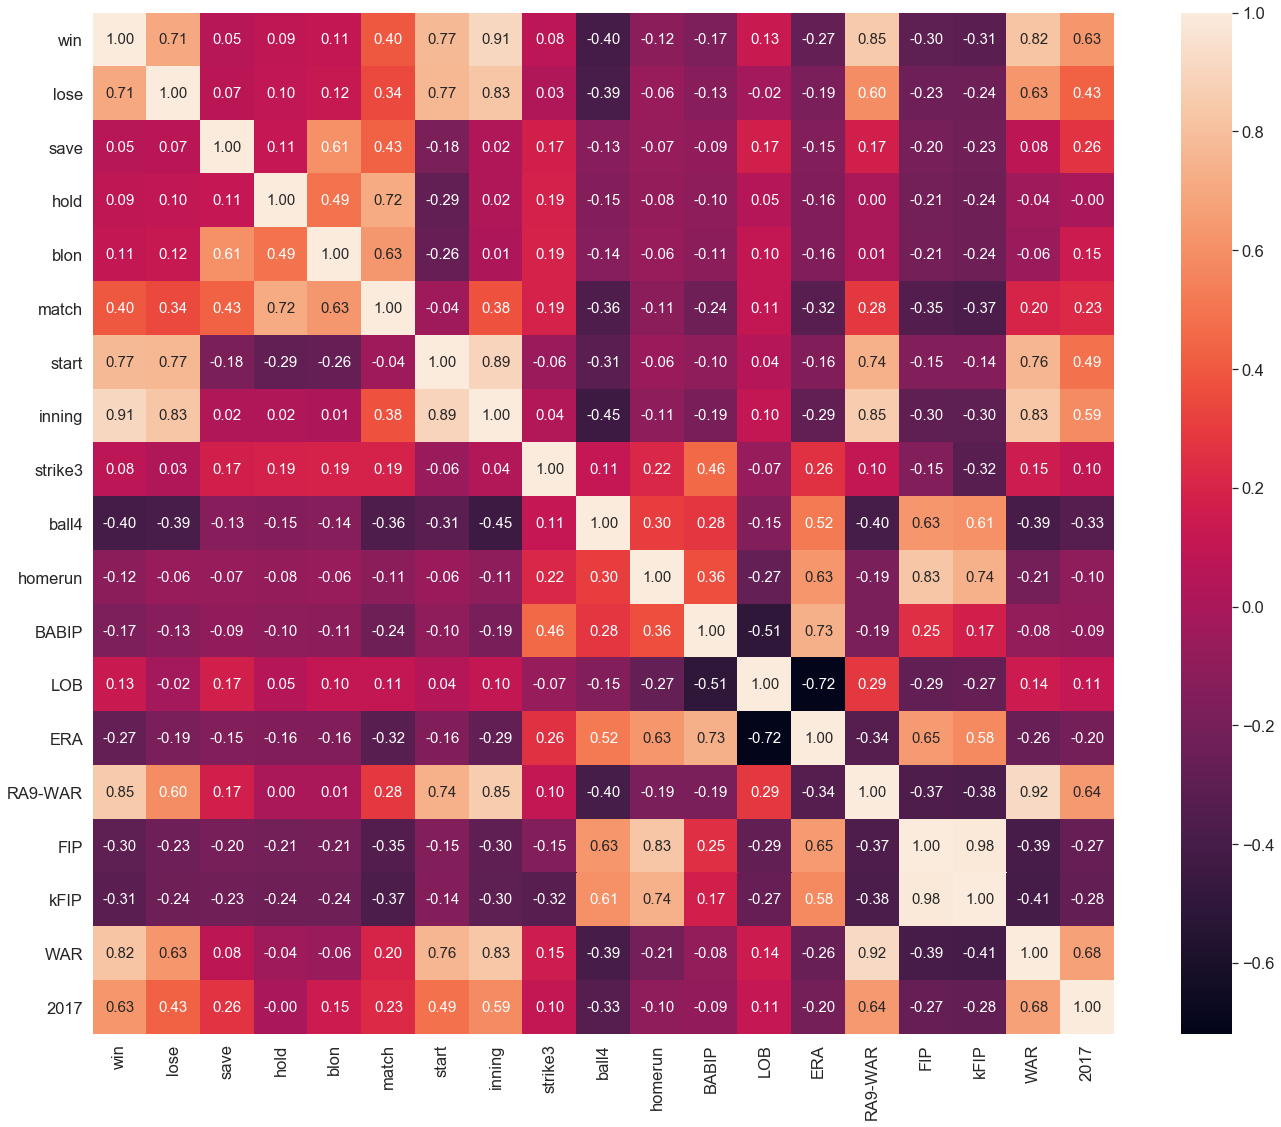

In [88]:
hm = sns.heatmap(corr.values,cbar=True,annot=True,square=True, 
                fmt=".2f", annot_kws = {'size':'15'}, yticklabels=show_cols,
                xticklabels=show_cols)
plt.tight_layout()
plt.show()

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#피처마다 vif계수 구해주기
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,1.9,FIP
1,2.1,WAR
2,1.9,볼넷/9
3,1.1,삼진/9
4,1.9,연봉(2017)


In [147]:
#분석결과 시각화하기

X = pitcher_df[['FIP','WAR','볼넷/9','삼진/9','연봉(2017)']]
lr = linear_model.LinearRegression()
model = lr.fit(X,y)
predict_2018_salary = lr.predict(X)
pitcher_df['예측연봉(2018)'] = pd.Series(predict_2018_salary)

pitcher = pd.read_csv(pitcher_file_path)
pitcher = pitcher[['선수명','연봉(2017)']]

result_df = pitcher_df.sort_values(by=['y'],ascending=False)
result_df.drop(['연봉(2017)'],axis=1,inplace=True, errors="ignore")
result_df = result_df.merge(pitcher,on=["선수명"],how="left")
result_df['연봉(2017)']

0      150000
1       85000
2       50000
3      120000
4       85000
        ...  
147      2700
148      2800
149      2700
150      2700
151      2700
Name: 연봉(2017), Length: 152, dtype: int64

## result_df = result_df[['선수명','y','예측연봉(2018)','연봉(2017)']]
result_df.columns = ['선수명','실제연봉(2018)',"예측연봉(2018)","작년연봉(2017)"]

result_df = result_df[result_df['작년연봉(2017)'] != result_df['실제연봉(2018)']]
result_df = result_df.reset_index()
result_df = result_df.iloc[:10,:]
result_df.head()


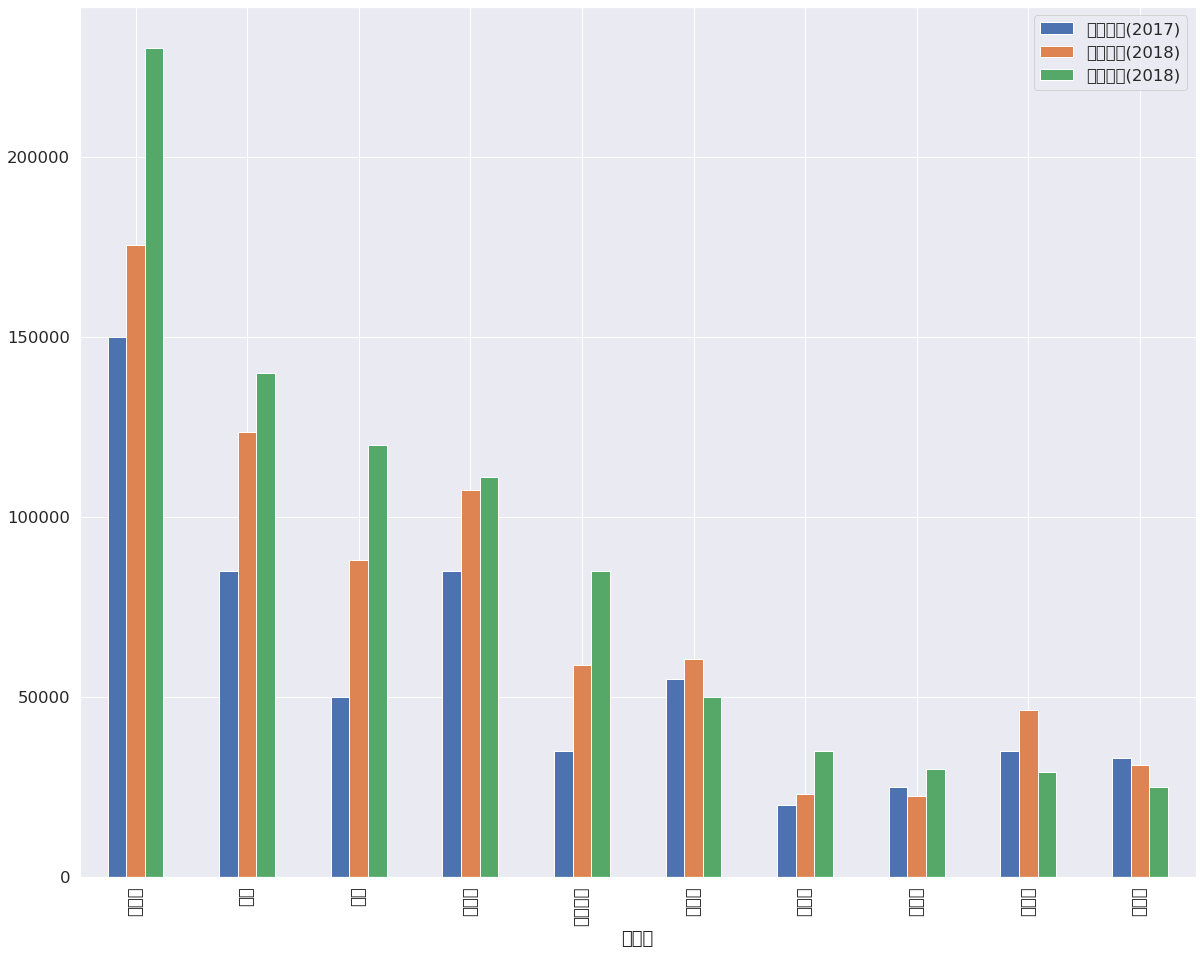

In [155]:
mpl.rc('font',family="NanumGothicOTF")
result_df.plot(x="선수명",y=["작년연봉(2017)","예측연봉(2018)","실제연봉(2018)"],kind="bar")